In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
# Load the dataset
df = pd.read_csv('synthetic_veg_crop_data.csv')

In [11]:
# Display the first few rows of the dataset
df.head()

,S. no.,Name,Soil_Type,Fertility,Photoperiod,N-P-K Ratio,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield,Season
0,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,26.483577,555.640013,6.723995,6.161744,459.558388,55.174597,59.082461,Summer
1,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,24.658866,548.369437,6.630615,7.341362,403.734739,58.475277,61.836617,Summer
2,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,23.036639,548.656752,6.228059,6.155745,567.426957,53.527221,62.014527,Spring
3,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,25.187162,588.832480,5.832263,6.274787,485.063743,59.937303,60.940745,Fall
4,1,Tomatoes,"Fertile, well-drained loam or sandy loam soil",High,Short Day Period,10:10:10,25.678596,504.979380,5.836229,6.185052,637.590250,56.769625,64.556501,Spring


In [15]:
# Check for missing values
print(df.isnull().sum())

S. no.             0
Name               0
Soil_Type          0
Fertility          0
Photoperiod        0
N-P-K Ratio        0
Temperature        0
Rainfall           0
pH                 0
Light_Hours        0
Light_Intensity    0
Rh                 0
Yield              0
Season             0
dtype: int64


In [ ]:
df['Name'].unique()

array(['Tomatoes', 'Eggplants', 'Asparagus', 'Chilli Peppers', 'Cabbage',
       'Cucumbers', 'Potatoes', 'Cauliflowers', 'Broccoli', 'Green Peas'],
      dtype=object)

In [ ]:
df['Soil_Type'].unique()

array(['Fertile, well-drained loam or sandy loam soil',
       'Well-drained, sandy loam or loam soil with high organic content',
       ' Deep sandy loam', 'medium, organic',
       'Well-drained, fertile loam with high organic content',
       'Well-drained, sandy loam soil', 'Loamy, well-drained soil',
       'Fertile, well-drained, moist soil with high organic matter content.',
       'Rich, well-drained, loamy soil',
       'Light, sandy, fertile, and well-drained soil'], dtype=object)

In [ ]:
df['Fertility'].unique()

array(['High', 'moderate'], dtype=object)

In [ ]:
df['Photoperiod'].unique()

array(['Short Day Period'], dtype=object)

In [ ]:
df['N-P-K Ratio'].unique()

array(['10:10:10', '05:10:10'], dtype=object)

In [ ]:
df['Season'].unique()

array([' Summer', 'Spring', ' Fall',
       ' Fall                                                                         ',
       ' Summer                                           ', 'Fall',
       'Winter', ' Winter', ' Fall      '], dtype=object)

In [16]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. no.           1000 non-null   int64  
 1   Name             1000 non-null   object 
 2   Soil_Type        1000 non-null   object 
 3   Fertility        1000 non-null   object 
 4   Photoperiod      1000 non-null   object 
 5   N-P-K Ratio      1000 non-null   object 
 6   Temperature      1000 non-null   float64
 7   Rainfall         1000 non-null   float64
 8   pH               1000 non-null   float64
 9   Light_Hours      1000 non-null   float64
 10  Light_Intensity  1000 non-null   float64
 11  Rh               1000 non-null   float64
 12  Yield            1000 non-null   float64
 13  Season           1000 non-null   object 
dtypes: float64(7), int64(1), object(6)
memory usage: 109.5+ KB
None


In [19]:
# Display basic statistics
display(df.describe())

,S. no.,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.500000,21.469601,901.178170,6.334505,7.803823,446.973795,62.566657,25.422725
std,2.873719,4.127673,267.609546,0.482434,1.248393,140.958975,10.407530,14.880897
min,1.000000,10.032192,400.356795,5.008253,6.000732,201.295040,40.340188,4.593589
25%,3.000000,18.784208,692.605623,6.048547,6.794432,340.205983,54.392259,19.052663
50%,5.500000,21.312237,912.538905,6.351051,7.592936,422.708570,60.038860,24.105095
75%,8.000000,24.182824,1079.095532,6.648184,8.669339,532.610057,69.612802,29.845462
max,10.000000,31.822844,1597.213303,7.494046,11.958007,799.287905,89.945240,65.047550


Name
Tomatoes          100
Eggplants         100
Asparagus         100
Chilli Peppers    100
Cabbage           100
Cucumbers         100
Potatoes          100
Cauliflowers      100
Broccoli          100
Green Peas        100
Name: count, dtype: int64


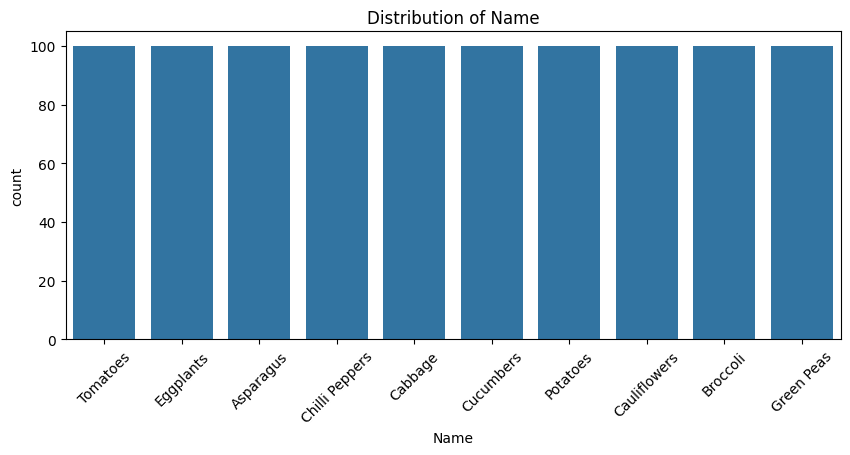

Soil_Type
Fertile, well-drained loam or sandy loam soil                          100
Well-drained, sandy loam or loam soil with high organic content        100
 Deep sandy loam                                                       100
medium, organic                                                        100
Well-drained, fertile loam with high organic content                   100
Well-drained, sandy loam soil                                          100
Loamy, well-drained soil                                               100
Fertile, well-drained, moist soil with high organic matter content.    100
Rich, well-drained, loamy soil                                         100
Light, sandy, fertile, and well-drained soil                           100
Name: count, dtype: int64


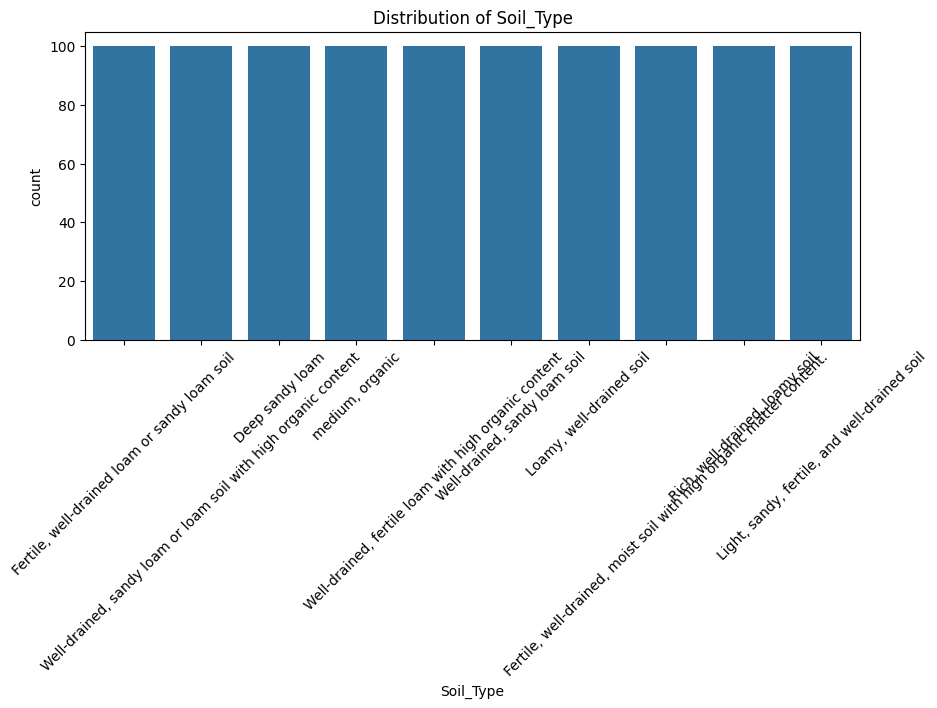

Fertility
High        700
moderate    300
Name: count, dtype: int64


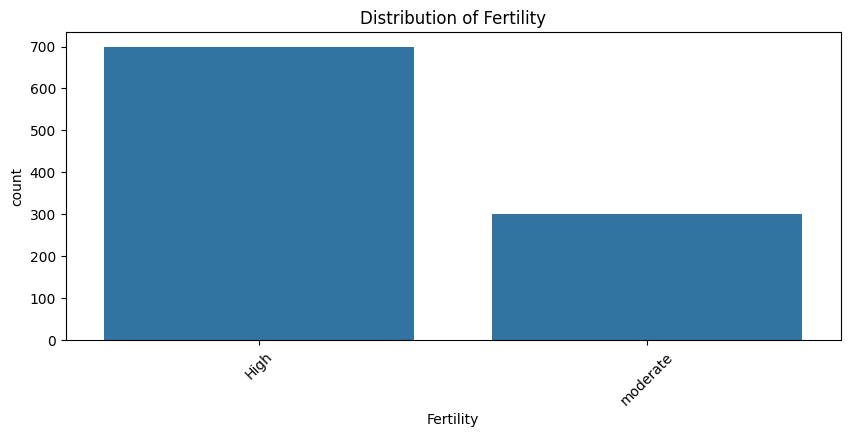

Season
Spring                                                                            352
 Fall                                                                             176
 Summer                                                                           159
Fall                                                                              100
 Fall                                                                              56
 Summer                                                                            47
Winter                                                                             45
 Fall                                                                              34
 Winter                                                                            31
Name: count, dtype: int64


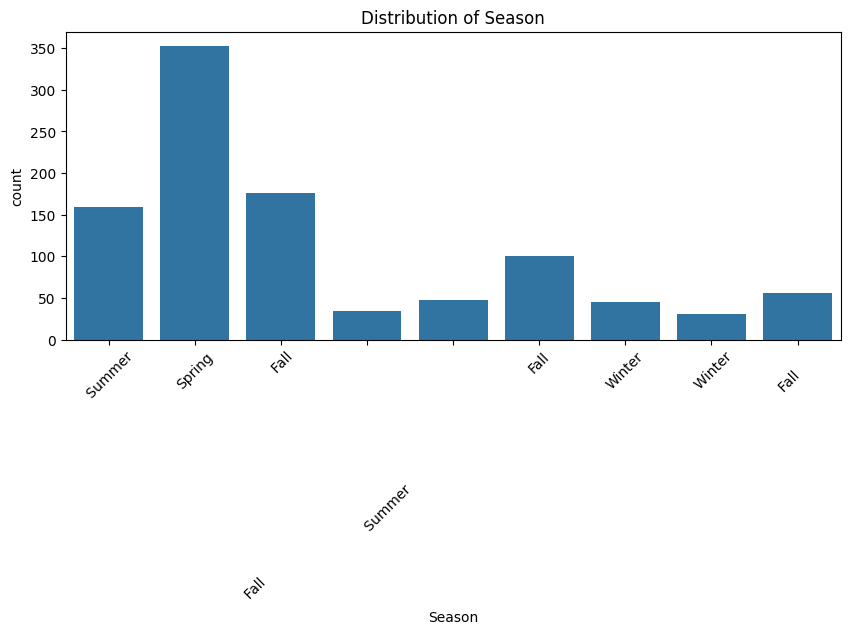

In [20]:
# Display the distribution of categorical variables
categorical_cols = ['Name', 'Soil_Type', 'Fertility', 'Season']
for col in categorical_cols:
    print(df[col].value_counts())
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

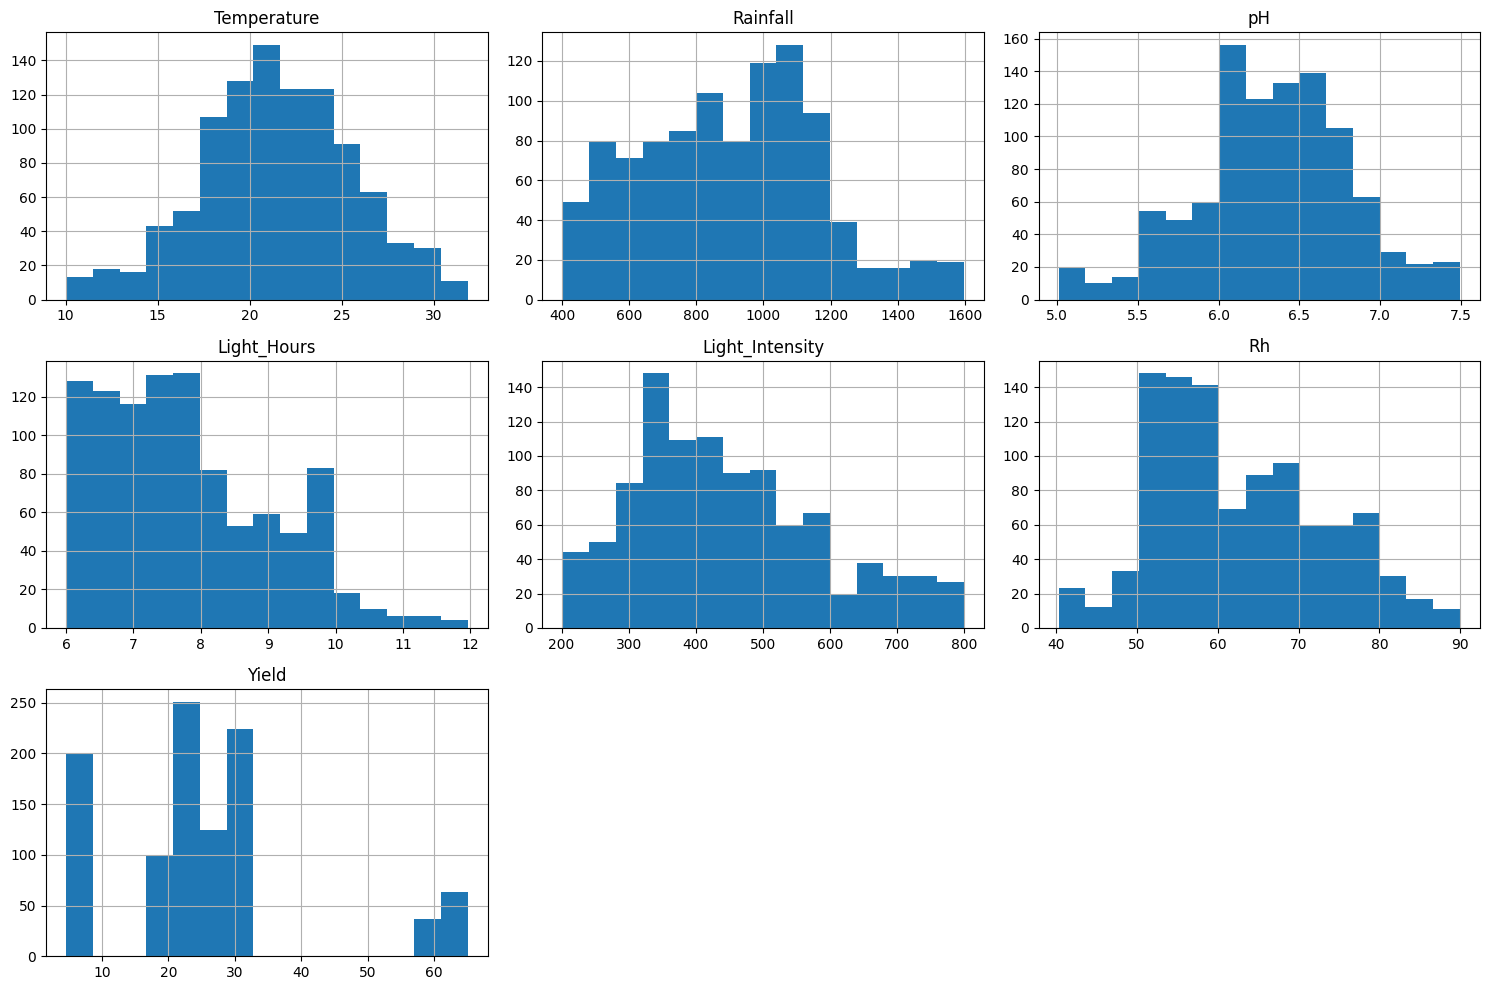

In [33]:
# Display the distribution of numerical variables
numerical_cols = ['Temperature', 'Rainfall', 'pH', 'Light_Hours', 'Light_Intensity', 'Rh', 'Yield']
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

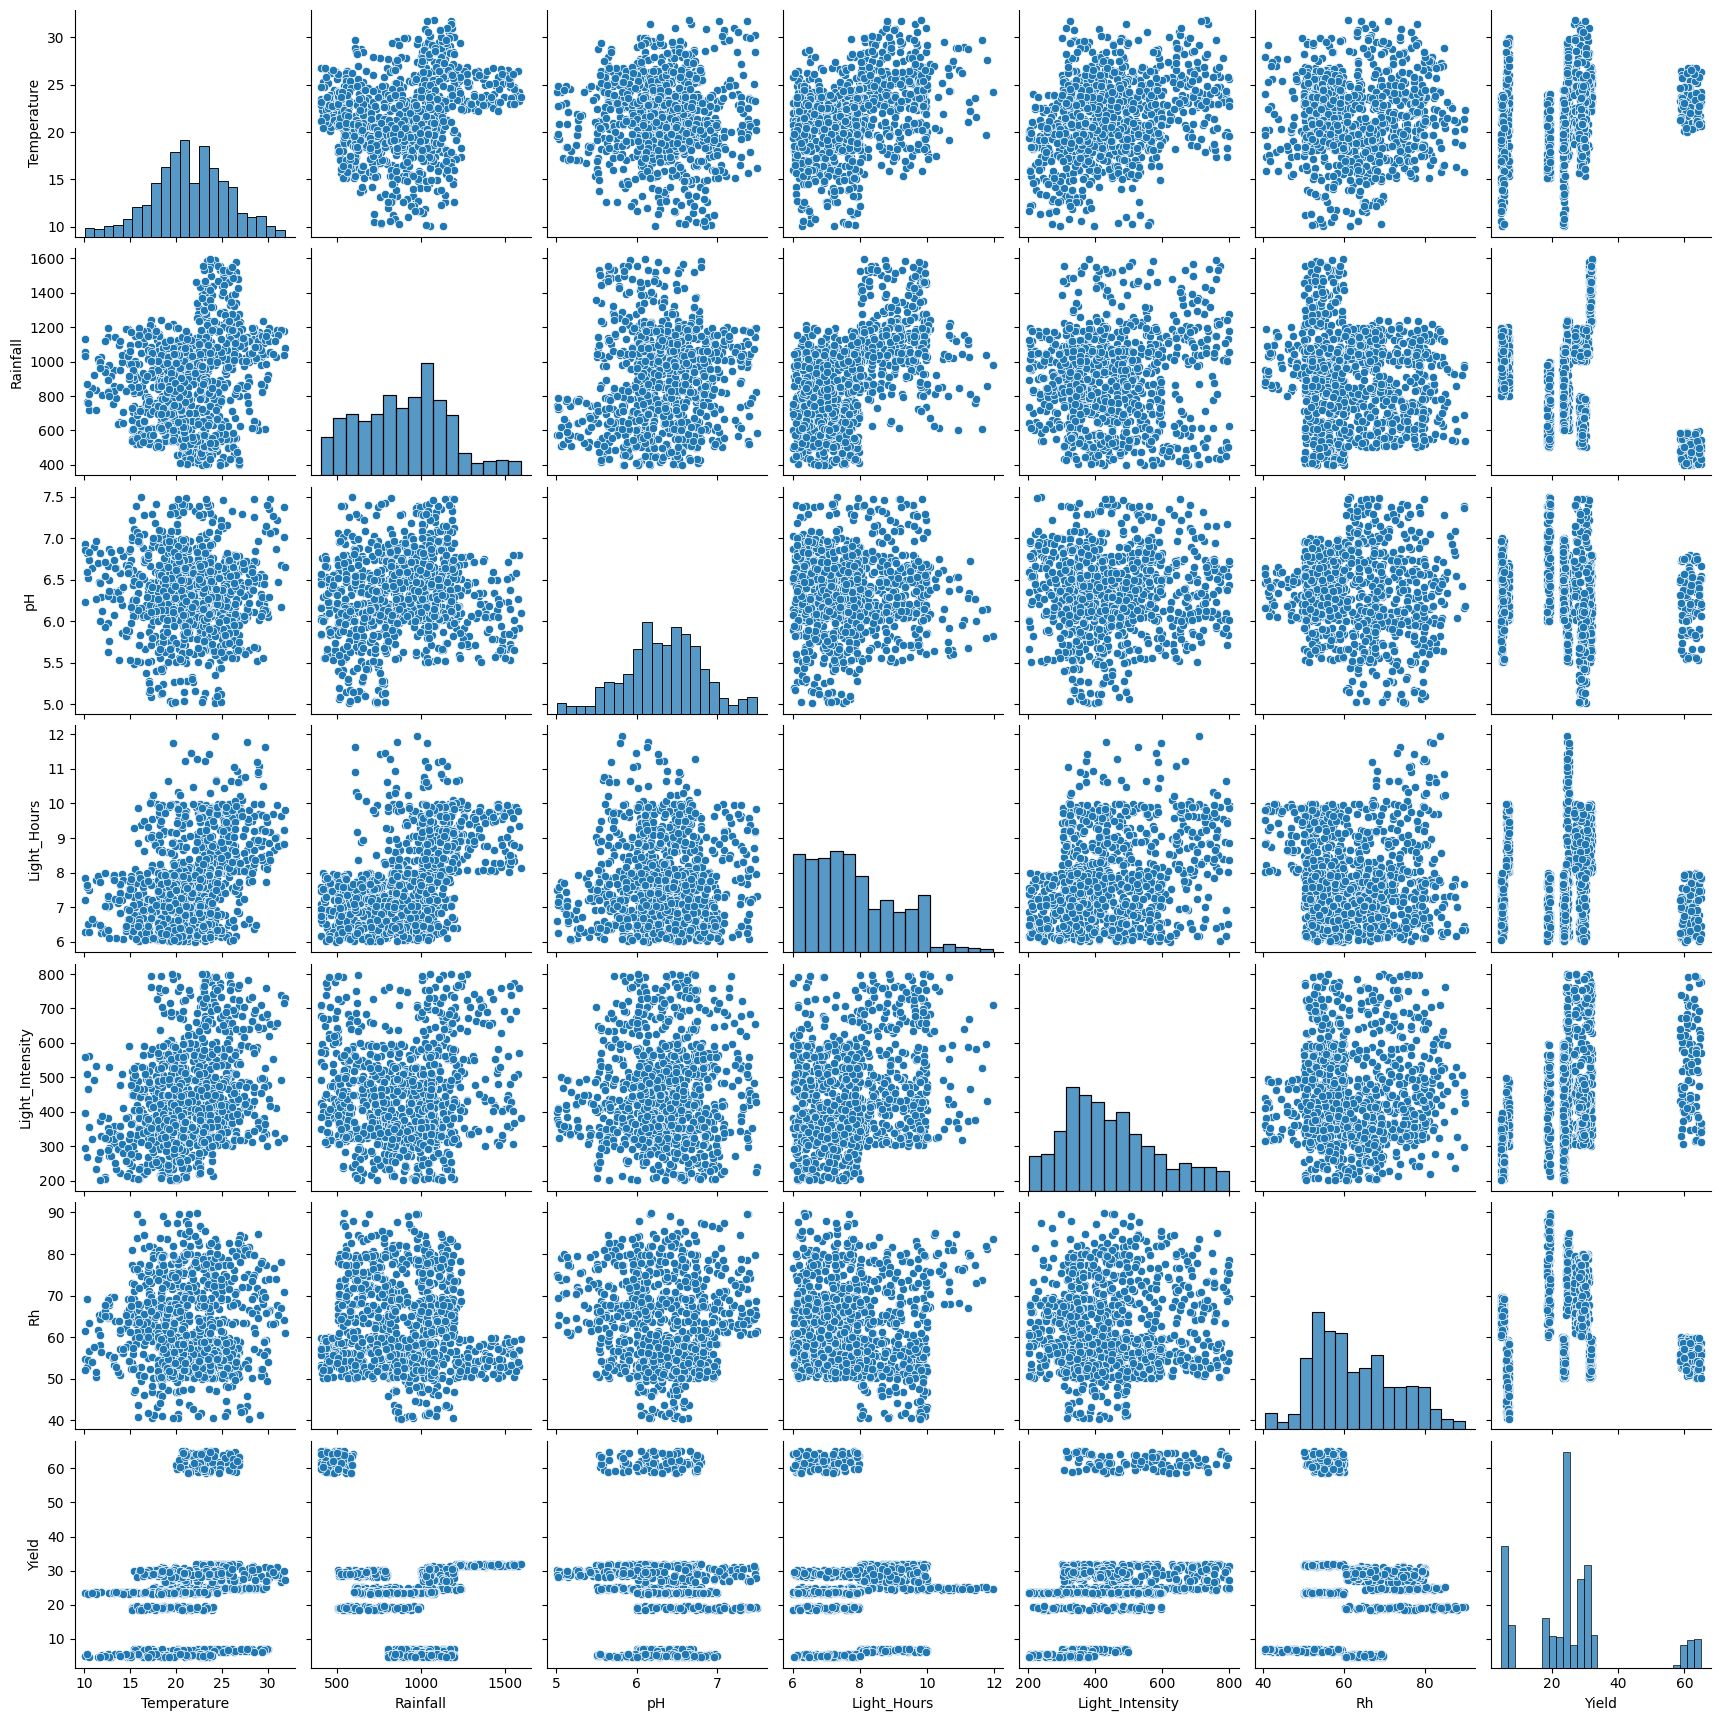

In [34]:
# Display pairplot for numerical variables to see relationships
sns.pairplot(df[numerical_cols])
plt.show()

,Temperature,Rainfall,pH,Light_Hours,Light_Intensity,Rh,Yield
Temperature,1.000000,0.185532,-0.019244,0.388995,0.309617,0.006177,0.260171
Rainfall,0.185532,1.000000,0.095766,0.505605,0.075148,-0.112657,-0.378651
pH,-0.019244,0.095766,1.000000,0.034089,0.031896,-0.051998,-0.119421
Light_Hours,0.388995,0.505605,0.034089,1.000000,0.274749,-0.038371,-0.123156
Light_Intensity,0.309617,0.075148,0.031896,0.274749,1.000000,0.040634,0.380466
Rh,0.006177,-0.112657,-0.051998,-0.038371,0.040634,1.000000,-0.080054
Yield,0.260171,-0.378651,-0.119421,-0.123156,0.380466,-0.080054,1.000000


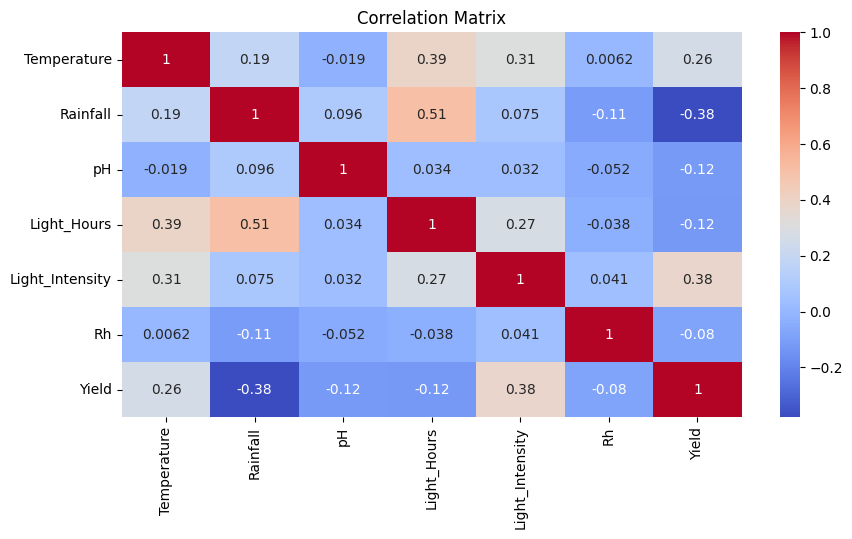

In [50]:
# Correlation matrix and heatmap
correlation_matrix = df[numerical_cols].corr()
display(correlation_matrix)
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [44]:
# Correlation between numerical variables and Yield
for col in numerical_cols:
    if col != 'Yield':
        corr, _ = pearsonr(df[col], df['Yield'])
        print(f'Correlation between {col} and Yield: {corr}')

Correlation between Temperature and Yield: 0.26017089213358213
Correlation between Rainfall and Yield: -0.37865107805178677
Correlation between pH and Yield: -0.11942074272485884
Correlation between Light_Hours and Yield: -0.12315636201126932
Correlation between Light_Intensity and Yield: 0.3804662649444202
Correlation between Rh and Yield: -0.08005427069741268


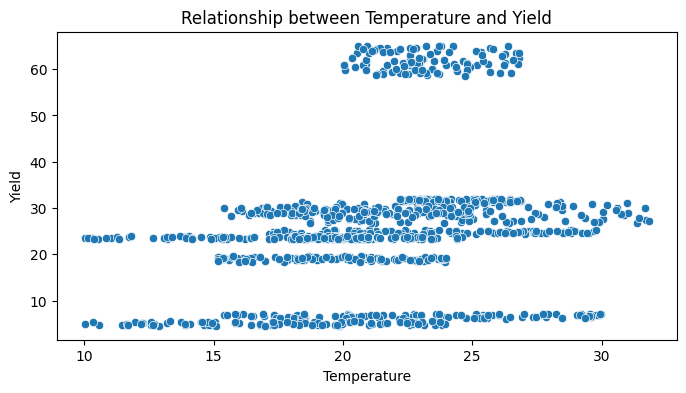

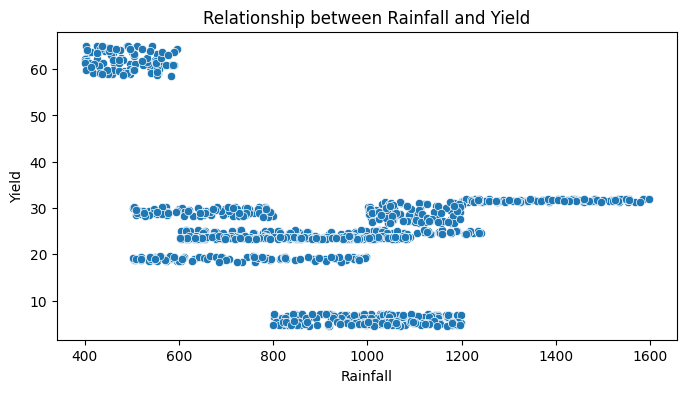

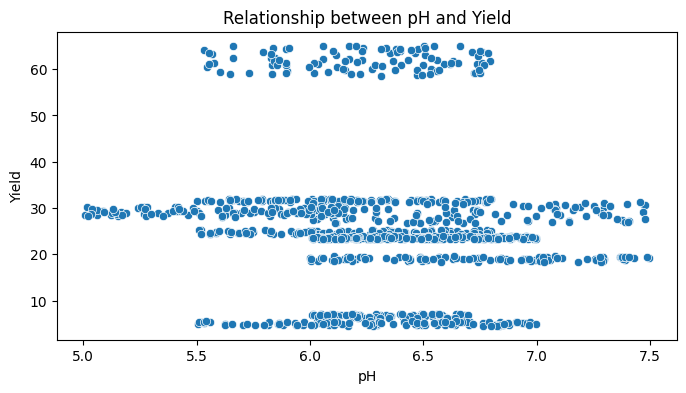

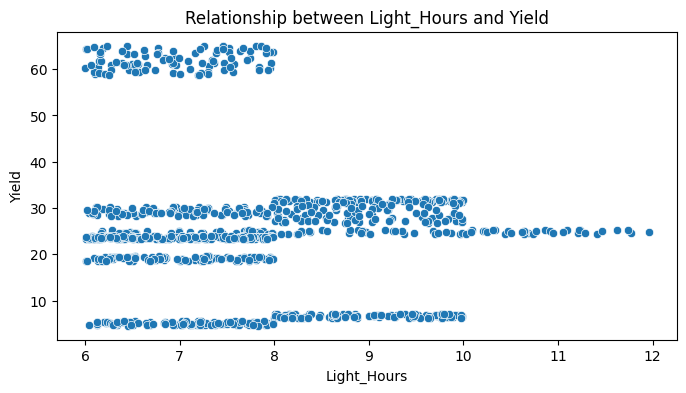

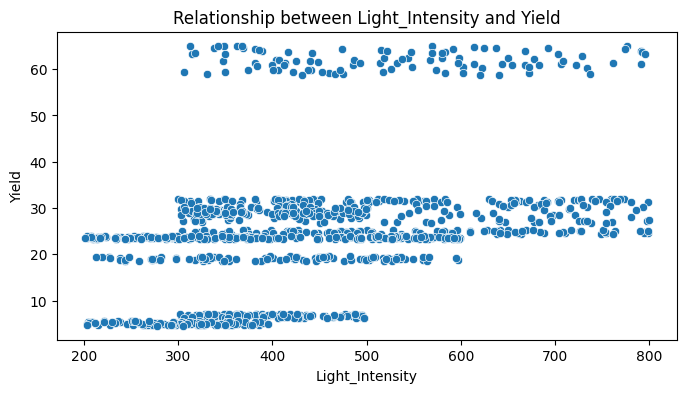

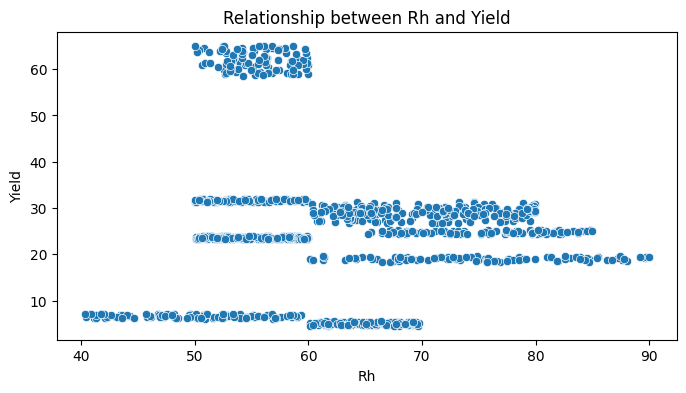

In [48]:
# Checking relationships between Yield and other numerical features
for col in numerical_cols:
    if col != 'Yield':
        plt.figure(figsize=(8, 4))
        sns.scatterplot(data=df, x=col, y='Yield')
        plt.title(f'Relationship between {col} and Yield')
        plt.show()

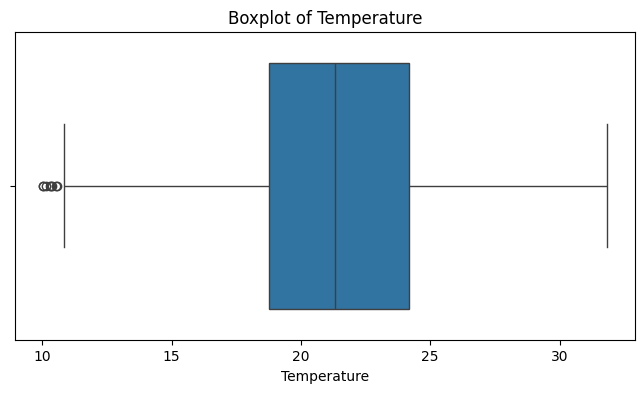

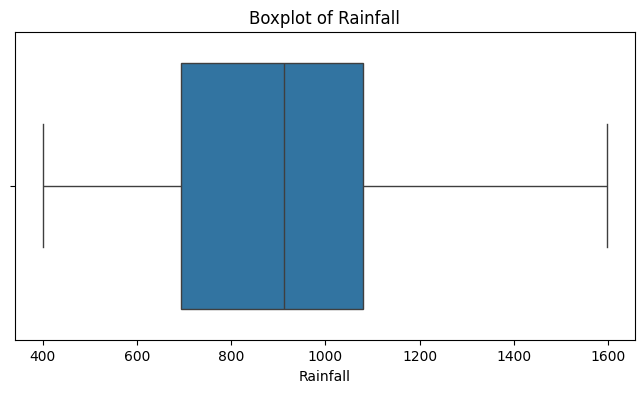

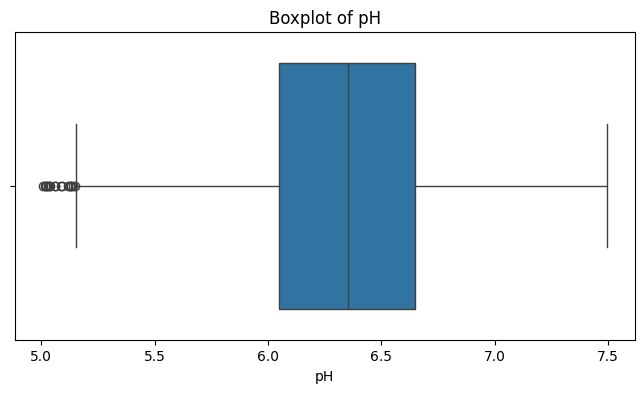

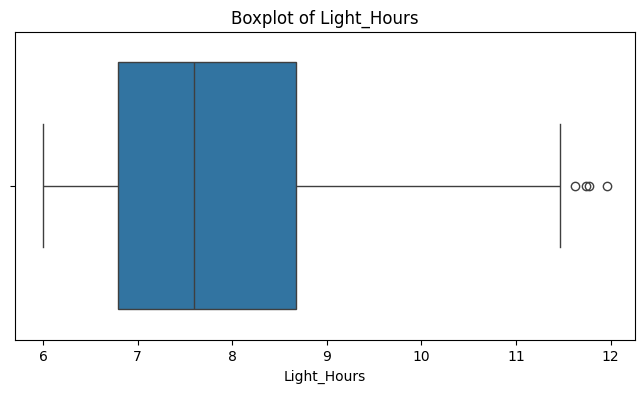

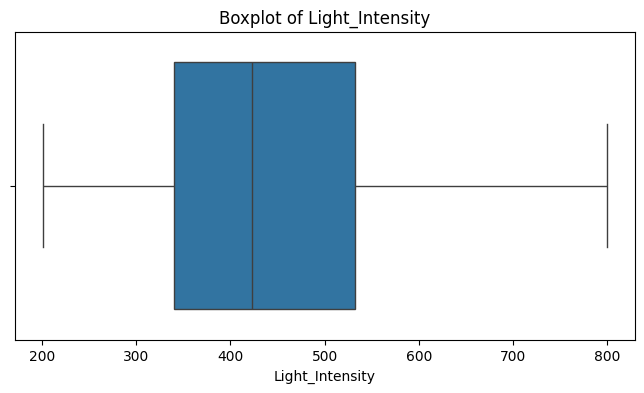

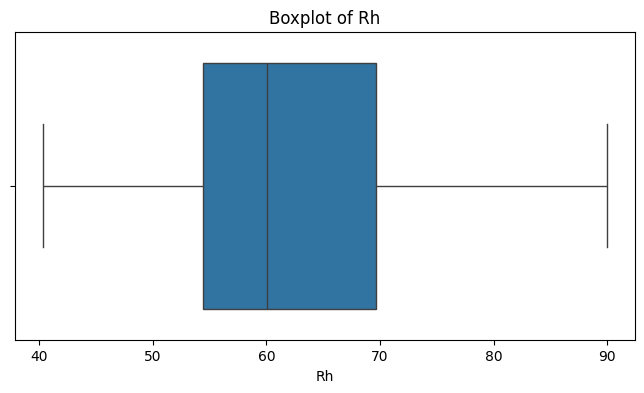

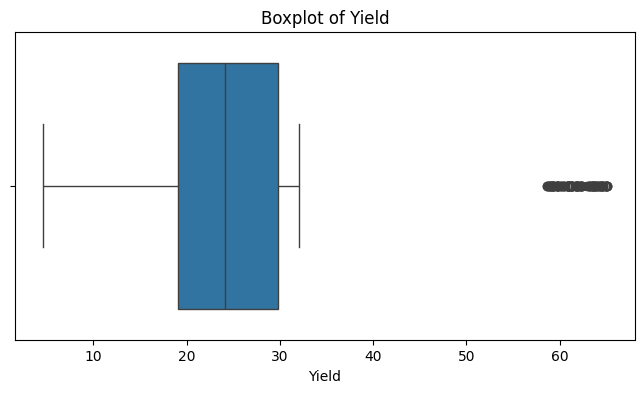

In [37]:
# Box plots to identify outliers in numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()


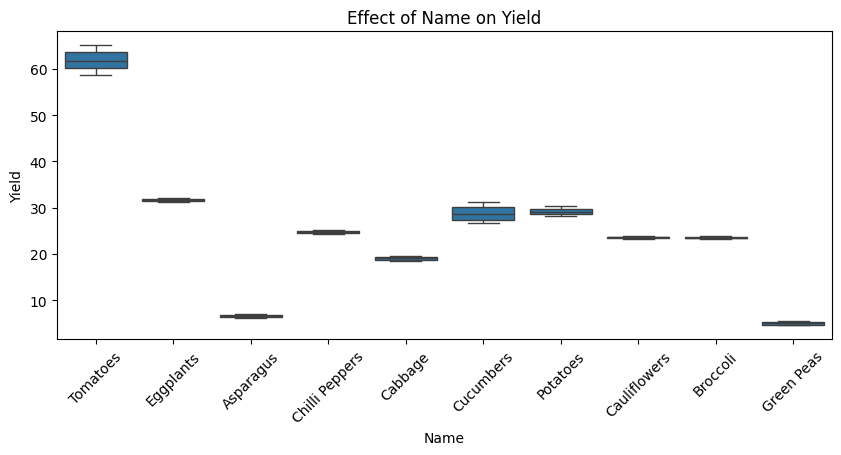

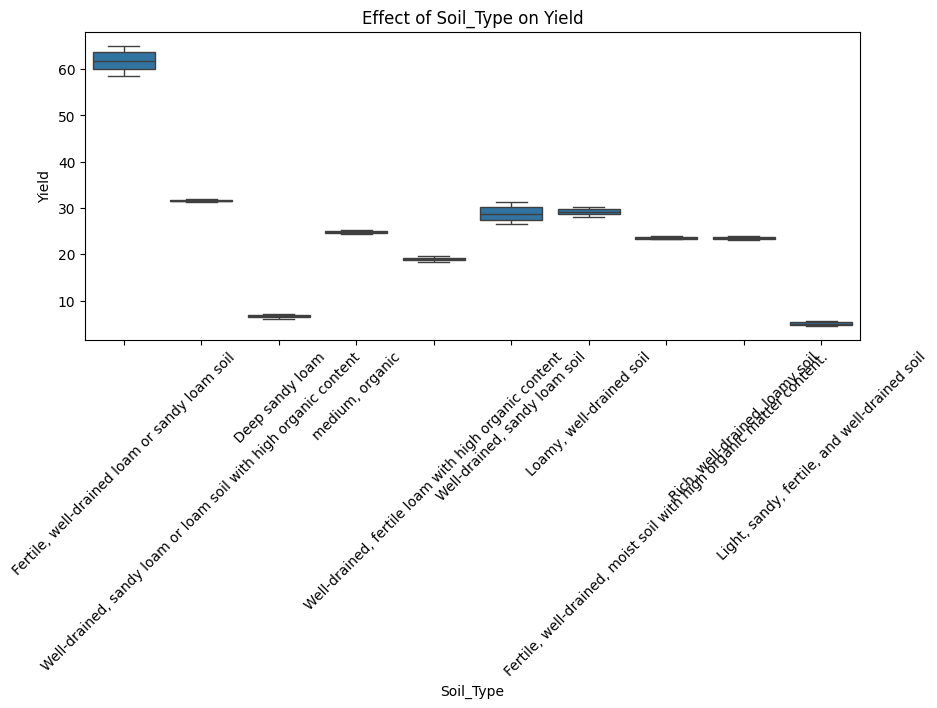

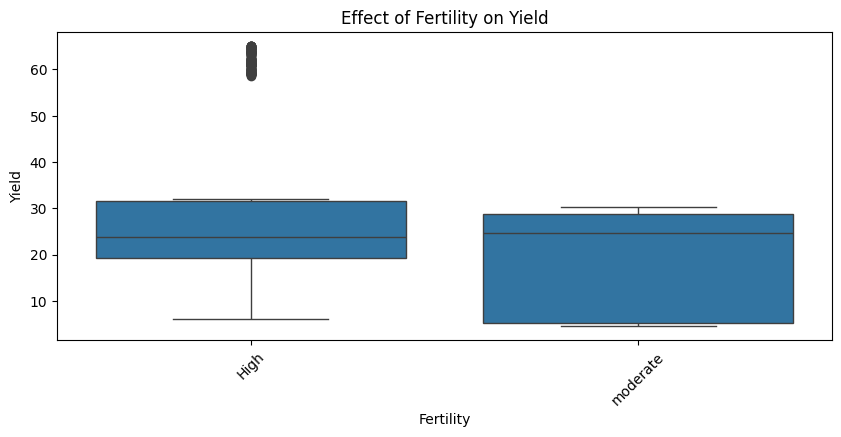

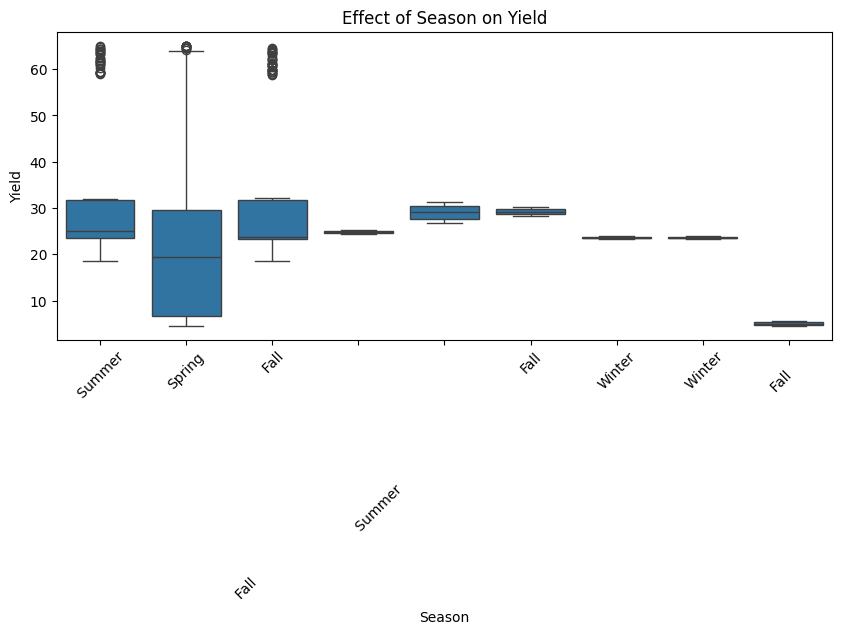

In [38]:
# Analyzing the effect of categorical variables on Yield
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col, y='Yield')
    plt.xticks(rotation=45)
    plt.title(f'Effect of {col} on Yield')
    plt.show()

- There are outliers in the temperature, ph, light hours and yield columns.
- There is a strong correlation of light intensity, rainfall and temperature with yield.
- Temperature, ph and light intensity have almost normal distribution.
- Rainfall, light hours and yield don't have a normal distribution